In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download feyzazkefe/trashnet

 95% 39.0M/40.8M [00:02<00:00, 22.5MB/s]
100% 40.8M/40.8M [00:02<00:00, 16.2MB/s]


In [ ]:
!unzip trashnet.zip

In [ ]:
### Keep this separate from the other content in the notebook
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
from pathlib import Path
import os

In [ ]:
batch_size = 32
target_size = (224, 224)

In [ ]:
dataset='./dataset-resized'

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    dataset,
    validation_split = 0.2,
    label_mode='int',
    subset="training",
    seed=1227,
    image_size=(224, 224),
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [ ]:
valid = tf.keras.utils.image_dataset_from_directory(
    dataset,
    validation_split = 0.2,
    label_mode='int',
    subset="training",
    seed=1227,
    image_size=(224, 224),
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [ ]:
classes = train.class_names
print(classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
num_classes = len(classes)

In [ ]:
num_classes

6

In [ ]:
auto = tf.data.AUTOTUNE

In [ ]:
val_batches = tf.data.experimental.cardinality(valid)
test = valid.take(val_batches // 5)
valid = valid.skip(val_batches // 5)

In [ ]:
train = train.prefetch(auto)
valid = valid.prefetch(auto)

In [ ]:
test = test.prefetch(auto)

In [ ]:
aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
input_size = (224, 224, 3)

In [ ]:
inputs = tf.keras.Input(shape=input_size)

In [ ]:
base = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_size)
base.trainable=False

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
x = aug(inputs)
x = base(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

In [ ]:
model = tf.keras.Model(inputs, output)

In [ ]:
lr = 0.001

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                             

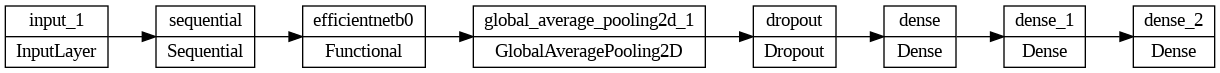

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=False, rankdir='LR')

In [ ]:
history = model.fit(train,
                      epochs=15,
                      validation_data=valid,
                      )

Epoch 1/15
64/64 [==============================] - 343s 5s/step - loss: 0.6480 - accuracy: 0.7725 - val_loss: 0.2696 - val_accuracy: 0.9090
Epoch 2/15
64/64 [==============================] - 313s 5s/step - loss: 0.3044 - accuracy: 0.8907 - val_loss: 0.1518 - val_accuracy: 0.9469
Epoch 3/15
64/64 [==============================] - 314s 5s/step - loss: 0.2135 - accuracy: 0.9258 - val_loss: 0.0851 - val_accuracy: 0.9762
Epoch 4/15
64/64 [==============================] - 371s 6s/step - loss: 0.1588 - accuracy: 0.9407 - val_loss: 0.0708 - val_accuracy: 0.9756
Epoch 5/15
64/64 [==============================] - 300s 5s/step - loss: 0.1357 - accuracy: 0.9535 - val_loss: 0.0589 - val_accuracy: 0.9792
Epoch 6/15
64/64 [==============================] - 310s 5s/step - loss: 0.1316 - accuracy: 0.9535 - val_loss: 0.0621 - val_accuracy: 0.9786
Epoch 7/15
64/64 [==============================] - 314s 5s/step - loss: 0.0712 - accuracy: 0.9728 - val_loss: 0.0937 - val_accuracy: 0.9707
Epoch 8/15
64

In [ ]:
!pip install pyyaml h5py

In [ ]:
model.save('model.h5')

TypeError: ignored

In [ ]:
!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorfl

In [ ]:
model.save('model_trashnet.h5')

TypeError: ignored